# Importing relevant libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import seaborn as sns
from matplotlib import pyplot as plt 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from tensorflow import keras
from keras.optimizers import RMSprop
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing the dataset

In [2]:
data = pd.read_excel('expenditure.xlsx')
data.head(10)

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,GDP
0,1970,1584447285,1274500872,309946413,355888584,51566978,304321606,471658387,420243556,2022508268
1,1971,1841776374,1488979227,352797146,461186038,65312885,395873153,543943029,482170420,2338633665
2,1972,2173503948,1754157436,419346513,543298293,81908866,461389427,675886102,612455114,2888075680
3,1973,2642036230,2101713070,540323160,735281775,118662251,616619524,827668741,728607005,3552264735
4,1974,3029851680,2363698646,666153034,1146364887,152013234,994351653,986315250,860680703,4274456487
5,1975,3432316441,2643339269,788977172,1191968694,172777780,1019190914,1118308210,1077907165,4692159286
6,1976,3559853259,2663572314,896280946,821032334,143713948,677318386,1066163165,854431207,4637294993
7,1977,3699541055,2631347501,1068193554,841167525,126953116,714214409,1049062721,890260698,4683462732
8,1978,3997202090,2821581269,1175620821,524618576,106478683,418139893,1082130230,881945671,4685667406
9,1979,4886605319,3498478159,1388127160,662803220,122312157,540491063,1268653105,1184314164,5558591590


In [3]:
data.tail(10)

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,GDP
38,2008,7834836184,7702785657,132050526,330777988,211959130,118818858,2674838442,4389905912,6450546701
39,2009,9595560763,8682858585,912702178,1232079529,959736536,272342994,1882654717,4088721401,8621573608
40,2010,10753467309,8909212708,1844254601,2259412007,2048493940,210918067,3569254416,6440274022,10141859710
41,2011,12446367327,9798884192,2647483135,2453419093,2063775094,389643999,4907581285,7708916956,12098450749
42,2012,16634983730,13210994236,3423989494,1687006841,2079170242,-392163400,4306653099,8386153418,14242490252
43,2013,16496333394,12976197987,3520135408,1758183494,1752817376,5366118,4197687389,7000435619,15451768659
44,2014,16509466499,12696087647,3813378852,1879216750,1873381534,5835216,4080440740,6578074753,15891049236
45,2015,17980136384,14211595773,3768540612,2003427020,1995427020,8000000,3824968960,7503864558,16304667807
46,2016,16922147372,12791007072,4131140301,2026381291,2015381291,11000000,4098132104,6426700365,16619960402
47,2017,17175538827,12739841956,4435696871,2764259332,2751103773,13155559,4246001246,6390877881,18036873279


In [4]:
data.index = data['Year']
data.drop('Year', axis=1, inplace=True)
data.head()

,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,GDP
Year,,,,,,,,,
1970,1584447285,1274500872,309946413,355888584,51566978,304321606,471658387,420243556,2022508268
1971,1841776374,1488979227,352797146,461186038,65312885,395873153,543943029,482170420,2338633665
1972,2173503948,1754157436,419346513,543298293,81908866,461389427,675886102,612455114,2888075680
1973,2642036230,2101713070,540323160,735281775,118662251,616619524,827668741,728607005,3552264735
1974,3029851680,2363698646,666153034,1146364887,152013234,994351653,986315250,860680703,4274456487


# Exploratory data analysis

In [5]:
print('number of missing data:')
print(data.isnull().sum())
data.describe()

number of missing data:
Final consumption expenditure                       0
Household consumption expenditure                   0
General government final consumption expenditure    0
Gross capital formation                             0
Gross fixed capital formation                       0
Changes in inventories                              0
Exports of goods and services                       0
Imports of goods and services                       0
GDP                                                 0
dtype: int64


,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,GDP
count,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,7.955956e+09,6.065107e+09,1.890849e+09,1.322210e+09,6.039934e+08,7.182170e+08,2.285372e+09,2.867271e+09,8.638102e+09
std,4.154135e+09,3.294354e+09,1.117486e+09,7.055679e+08,7.087451e+08,6.925444e+08,1.107209e+09,2.121695e+09,3.781498e+09
min,1.584447e+09,1.274501e+09,1.320505e+08,9.491022e+07,5.156698e+07,-3.921634e+08,4.716584e+08,4.202436e+08,2.022508e+09
25%,6.233957e+09,4.271596e+09,1.037791e+09,7.171621e+08,1.716701e+08,9.240303e+07,1.459474e+09,1.339493e+09,6.442810e+09
50%,7.185295e+09,5.259903e+09,1.844879e+09,1.264659e+09,2.814751e+08,6.469690e+08,2.138755e+09,2.468111e+09,8.328807e+09
75%,9.273717e+09,7.015963e+09,2.571177e+09,1.878322e+09,7.652004e+08,1.340175e+09,2.894974e+09,3.276583e+09,1.058417e+10
max,1.798014e+10,1.421160e+10,4.435697e+09,2.764259e+09,2.751104e+09,1.917728e+09,4.907581e+09,8.386153e+09,1.803687e+10


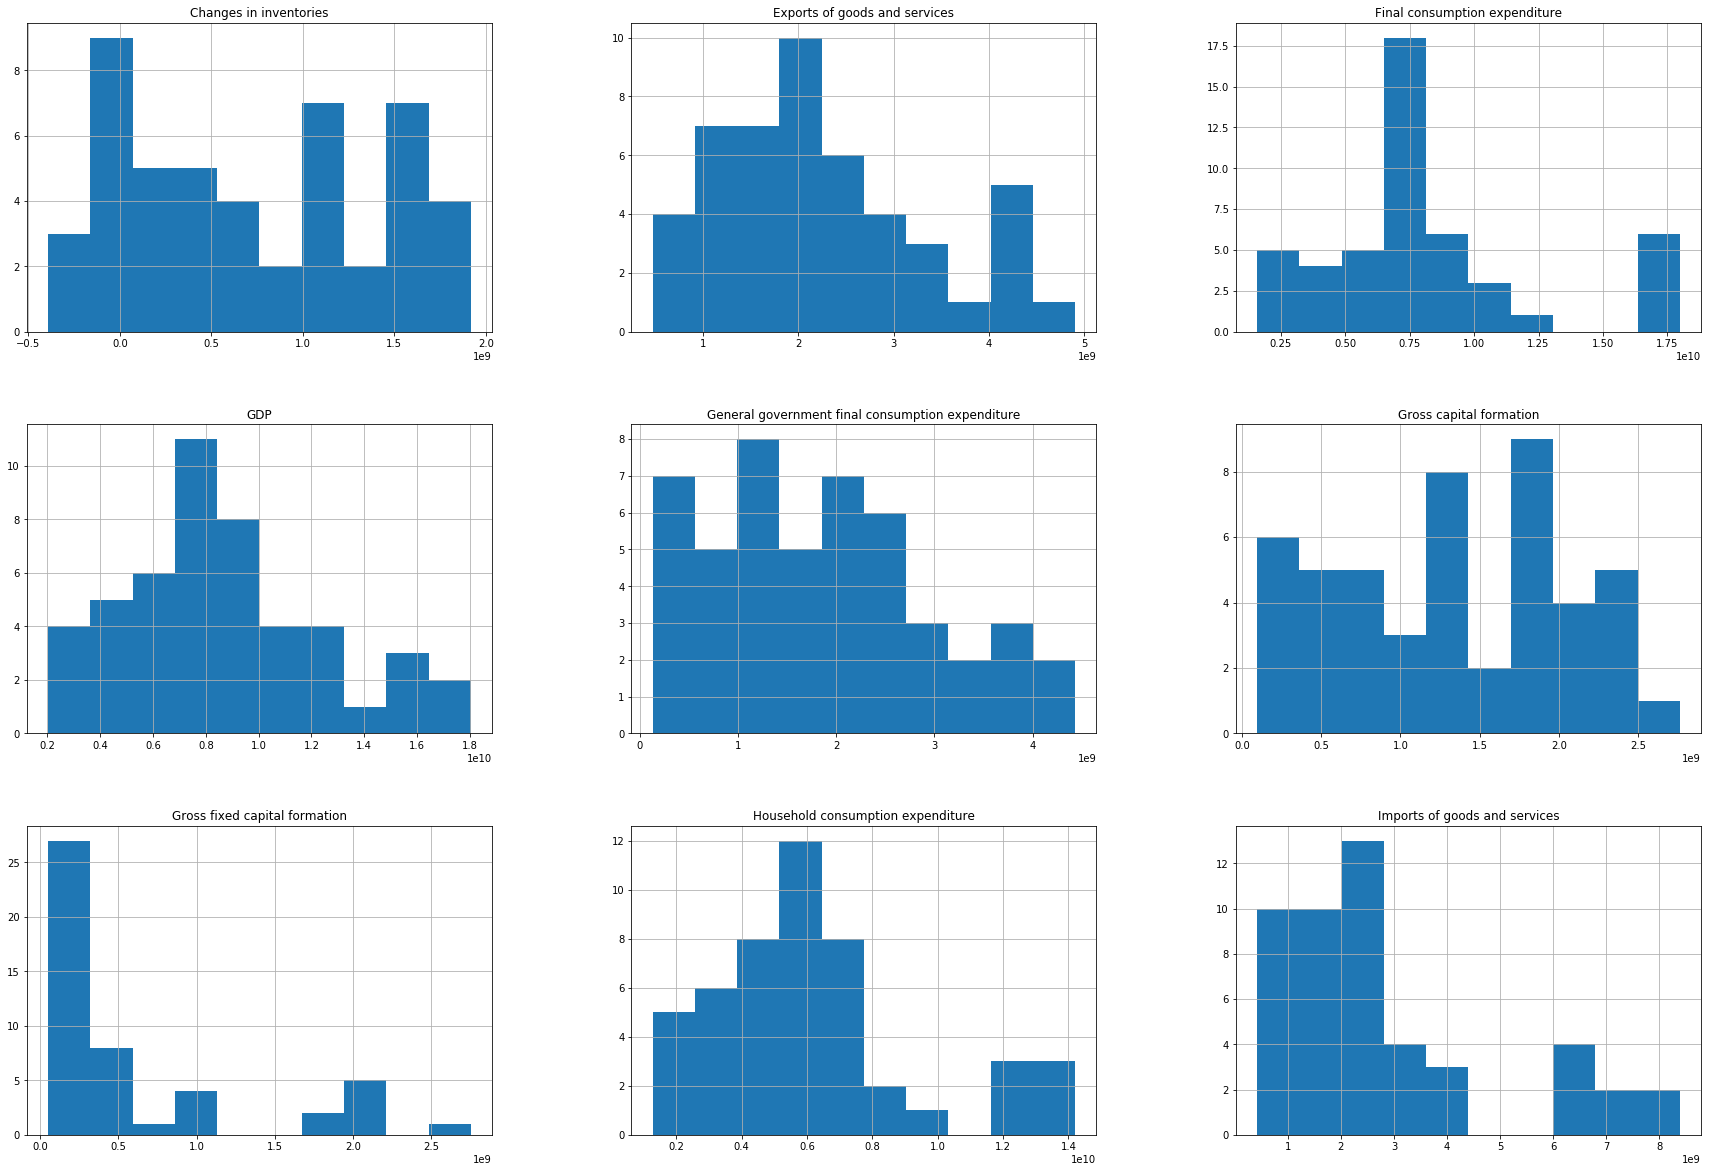

In [6]:
data.hist(figsize=(30,50), sharex = False, layout=(7,3))
plt.show()

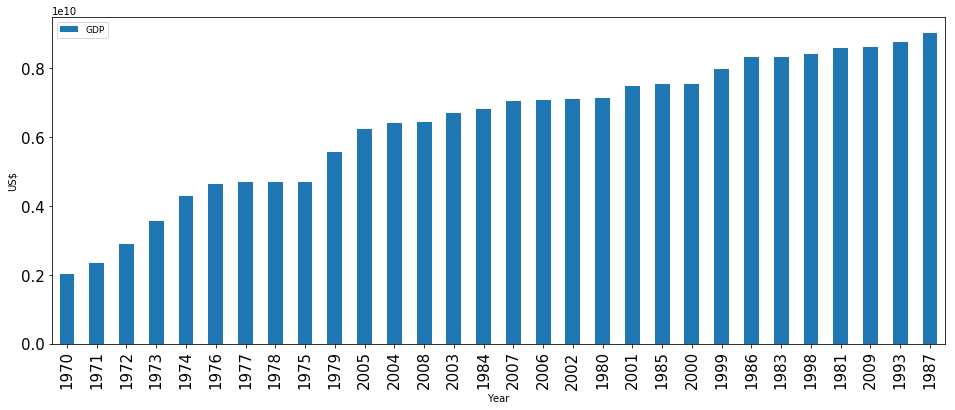

In [7]:
df_plot = data[[ 'GDP']].sort_values(by='GDP', ascending=True).head(30)
df_plot.plot(kind='bar', figsize=(16, 6), fontsize=15)
plt.xlabel('Year'); plt.legend(fontsize=9);
plt.ylabel('US$') ; plt.legend(fontsize=9);

# defining input values(X-features) and output values (Y-values)

In [8]:
X = data.iloc[:,:8].values
X

array([[ 1584447285,  1274500872,   309946413,   355888584,    51566978,
          304321606,   471658387,   420243556],
       [ 1841776374,  1488979227,   352797146,   461186038,    65312885,
          395873153,   543943029,   482170420],
       [ 2173503948,  1754157436,   419346513,   543298293,    81908866,
          461389427,   675886102,   612455114],
       [ 2642036230,  2101713070,   540323160,   735281775,   118662251,
          616619524,   827668741,   728607005],
       [ 3029851680,  2363698646,   666153034,  1146364887,   152013234,
          994351653,   986315250,   860680703],
       [ 3432316441,  2643339269,   788977172,  1191968694,   172777780,
         1019190914,  1118308210,  1077907165],
       [ 3559853259,  2663572314,   896280946,   821032334,   143713948,
          677318386,  1066163165,   854431207],
       [ 3699541055,  2631347501,  1068193554,   841167525,   126953116,
          714214409,  1049062721,   890260698],
       [ 3997202090,  2821581269

In [9]:
X.shape

(48, 8)

In [10]:
Y = data.iloc[:,8].values
Y

array([ 2022508268,  2338633665,  2888075680,  3552264735,  4274456487,
        4692159286,  4637294993,  4683462732,  4685667406,  5558591590,
        7147652745,  8599417215,  9166515154,  8333928987,  6818383918,
        7547808636,  8323685043,  9024830893, 10461540564, 11063309169,
       11737754241, 10952078269,  9031463630,  8773058453,  9224030543,
        9576463535, 11656610461, 11992240001,  8401377596,  7985300000,
        7548600000,  7495500000,  7111400000,  6705400000,  6419600000,
        6222900000,  7082932167,  7032746175,  6450546701,  8621573608,
       10141859710, 12098450749, 14242490252, 15451768659, 15891049236,
       16304667807, 16619960402, 18036873279], dtype=int64)

In [11]:
y = np.reshape(Y,(-1,1))
y

array([[ 2022508268],
       [ 2338633665],
       [ 2888075680],
       [ 3552264735],
       [ 4274456487],
       [ 4692159286],
       [ 4637294993],
       [ 4683462732],
       [ 4685667406],
       [ 5558591590],
       [ 7147652745],
       [ 8599417215],
       [ 9166515154],
       [ 8333928987],
       [ 6818383918],
       [ 7547808636],
       [ 8323685043],
       [ 9024830893],
       [10461540564],
       [11063309169],
       [11737754241],
       [10952078269],
       [ 9031463630],
       [ 8773058453],
       [ 9224030543],
       [ 9576463535],
       [11656610461],
       [11992240001],
       [ 8401377596],
       [ 7985300000],
       [ 7548600000],
       [ 7495500000],
       [ 7111400000],
       [ 6705400000],
       [ 6419600000],
       [ 6222900000],
       [ 7082932167],
       [ 7032746175],
       [ 6450546701],
       [ 8621573608],
       [10141859710],
       [12098450749],
       [14242490252],
       [15451768659],
       [15891049236],
       [16

In [12]:
y.shape

(48, 1)

# Scaling our data

In [13]:
Ssc = StandardScaler()
X_scaled = Ssc.fit_transform(X)
y_scaled = Ssc.fit_transform(y)
print(X_scaled)
y_scaled

[[-1.55000581 -1.46957551 -1.42966566 -1.38405909 -0.7876913  -0.60396899
  -1.65543057 -1.16554099]
 [-1.487405   -1.40378172 -1.39091424 -1.23324194 -0.76809134 -0.47037413
  -1.58945423 -1.13604468]
 [-1.40670517 -1.32243515 -1.3307313  -1.11563286 -0.74442754 -0.37477075
  -1.46902587 -1.07398892]
 [-1.29272467 -1.21581833 -1.22132786 -0.84065563 -0.69202179 -0.14825417
  -1.33048934 -1.01866473]
 [-1.19838027 -1.13545114 -1.10753547 -0.25186282 -0.64446743  0.40294427
  -1.18568796 -0.95575685]
 [-1.10047211 -1.04966805 -0.99646128 -0.18654466 -0.61485978  0.43919049
  -1.06521406 -0.85228995]
 [-1.06944605 -1.04346132 -0.8994227  -0.71783543 -0.65630118 -0.05968051
  -1.11280839 -0.95873355]
 [-1.03546401 -1.05334667 -0.74395608 -0.68899587 -0.68020004 -0.00584069
  -1.12841648 -0.94166764]
 [-0.96305159 -0.9949902  -0.64680582 -1.14238775 -0.70939404 -0.43788181
  -1.09823478 -0.94562816]
 [-0.74668523 -0.78734403 -0.45462885 -0.9444664  -0.68681747 -0.25934319
  -0.92798981 -0.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.76797694],
       [-1.68349436],
       [-1.53665934],
       [-1.35915887],
       [-1.16615753],
       [-1.05452901],
       [-1.06919116],
       [-1.05685311],
       [-1.05626393],
       [-0.82298027],
       [-0.39831338],
       [-0.0103382 ],
       [ 0.14121526],
       [-0.08128831],
       [-0.48630847],
       [-0.29137417],
       [-0.08402594],
       [ 0.10335101],
       [ 0.48730289],
       [ 0.64812188],
       [ 0.8283632 ],
       [ 0.6183961 ],
       [ 0.10512357],
       [ 0.03606636],
       [ 0.1565859 ],
       [ 0.25077146],
       [ 0.80667802],
       [ 0.89637297],
       [-0.06326308],
       [-0.17445727],
       [-0.29116268],
       [-0.30535333],
       [-0.40800171],
       [-0.51650273],
       [-0.59288103],
       [-0.64544791],
       [-0.41560956],
       [-0.42902146],
       [-0.58461072],
       [-0.00441704],
       [ 0.40187014],
       [ 0.92475714],
       [ 1.4977386 ],
       [ 1.82091087],
       [ 1.93830592],
       [ 2

# spliting data for training and testing the model ( 70% for training and 30% testing)

In [14]:
np.random.seed(9)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled, test_size = 0.3, random_state = 42)

# Defining the model

In [16]:
model = Sequential()
model.add(Dense(200,input_dim = 8, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(units = 1))

# Structure of the model(summary)¶

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 42,201
Trainable params: 42,201
Non-trainable params: 0
_________________________________________________________________


# compiling the model

In [18]:
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# fitting the model

In [19]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 1000,  validation_split = 0.2, verbose=1)

Train on 26 samples, validate on 7 samples
Epoch 1/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.0578 - mean_squared_error: 1.0578 - val_loss: 0.8957 - val_mean_squared_error: 0.8957
Epoch 2/1000
26/26 [==============================] - 0s 375us/step - loss: 0.7430 - mean_squared_error: 0.7430 - val_loss: 0.6162 - val_mean_squared_error: 0.6162
Epoch 3/1000
26/26 [==============================] - 0s 375us/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.4861 - val_mean_squared_error: 0.4861
Epoch 4/1000
26/26 [==============================] - 0s 375us/step - loss: 0.4053 - mean_squared_error: 0.4053 - val_loss: 0.3332 - val_mean_squared_error: 0.3332
Epoch 5/1000
26/26 [==============================] - 0s 375us/step - loss: 0.2949 - mean_squared_error: 0.2949 - val_loss: 0.2364 - val_mean_squared_error: 0.2364
Epoch 6/1000
26/26 [==============================] - 0s 338us/step - loss: 0.2232 - mean_squared_error: 0.2232 - val_loss: 0.1812 - val_me

Epoch 100/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 101/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 102/1000
26/26 [==============================] - 0s 338us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 103/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 104/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 105/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoc

26/26 [==============================] - 0s 225us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 199/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 200/1000
26/26 [==============================] - 0s 188us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 201/1000
26/26 [==============================] - 0s 376us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 202/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 203/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 204/1000
26/2

26/26 [==============================] - 0s 300us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 297/1000
26/26 [==============================] - 0s 262us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 298/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 299/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 300/1000
26/26 [==============================] - 0s 300us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 301/1000
26/26 [==============================] - 0s 225us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 302/1000
26/2

26/26 [==============================] - 0s 225us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 395/1000
26/26 [==============================] - 0s 188us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 396/1000
26/26 [==============================] - 0s 413us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 397/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 398/1000
26/26 [==============================] - 0s 300us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 399/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 400/1000
26/2

26/26 [==============================] - 0s 489us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 493/1000
26/26 [==============================] - 0s 675us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 494/1000
26/26 [==============================] - 0s 188us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 495/1000
26/26 [==============================] - 0s 788us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 496/1000
26/26 [==============================] - 0s 563us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 497/1000
26/26 [==============================] - 0s 976us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 498/1000
26/2

26/26 [==============================] - 0s 225us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 591/1000
26/26 [==============================] - 0s 451us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 592/1000
26/26 [==============================] - 0s 638us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 593/1000
26/26 [==============================] - 0s 450us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 594/1000
26/26 [==============================] - 0s 754us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 595/1000
26/26 [==============================] - 0s 638us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 596/1000
26/2

26/26 [==============================] - 0s 300us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 689/1000
26/26 [==============================] - 0s 338us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 690/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 691/1000
26/26 [==============================] - 0s 188us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 692/1000
26/26 [==============================] - 0s 976us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 693/1000
26/26 [==============================] - 0s 263us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 694/1000
26/2

Epoch 785/1000
26/26 [==============================] - 0s 225us/step - loss: 9.2732e-04 - mean_squared_error: 9.2732e-04 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 786/1000
26/26 [==============================] - 0s 188us/step - loss: 9.2747e-04 - mean_squared_error: 9.2747e-04 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 787/1000
26/26 [==============================] - 0s 188us/step - loss: 9.3542e-04 - mean_squared_error: 9.3542e-04 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 788/1000
26/26 [==============================] - 0s 188us/step - loss: 9.2947e-04 - mean_squared_error: 9.2947e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 789/1000
26/26 [==============================] - 0s 1ms/step - loss: 9.3312e-04 - mean_squared_error: 9.3312e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 790/1000
26/26 [==============================] - 0s 225us/step - loss: 9.2192e-04 - mean_squared_error: 9.2192e-04 - val_loss

26/26 [==============================] - 0s 263us/step - loss: 7.9533e-04 - mean_squared_error: 7.9533e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 880/1000
26/26 [==============================] - 0s 300us/step - loss: 7.9481e-04 - mean_squared_error: 7.9481e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 881/1000
26/26 [==============================] - 0s 262us/step - loss: 7.9503e-04 - mean_squared_error: 7.9503e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 882/1000
26/26 [==============================] - 0s 300us/step - loss: 7.8169e-04 - mean_squared_error: 7.8169e-04 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 883/1000
26/26 [==============================] - 0s 263us/step - loss: 7.8163e-04 - mean_squared_error: 7.8163e-04 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 884/1000
26/26 [==============================] - 0s 225us/step - loss: 7.8302e-04 - mean_squared_error: 7.8302e-04 - val_loss: 0.0303 - va

26/26 [==============================] - 0s 300us/step - loss: 6.6366e-04 - mean_squared_error: 6.6366e-04 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 974/1000
26/26 [==============================] - 0s 263us/step - loss: 6.6003e-04 - mean_squared_error: 6.6003e-04 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 975/1000
26/26 [==============================] - 0s 300us/step - loss: 6.6460e-04 - mean_squared_error: 6.6460e-04 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 976/1000
26/26 [==============================] - 0s 263us/step - loss: 6.6093e-04 - mean_squared_error: 6.6093e-04 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 977/1000
26/26 [==============================] - 0s 375us/step - loss: 6.6465e-04 - mean_squared_error: 6.6465e-04 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 978/1000
26/26 [==============================] - 0s 639us/step - loss: 6.6229e-04 - mean_squared_error: 6.6229e-04 - val_loss: 0.0294 - va

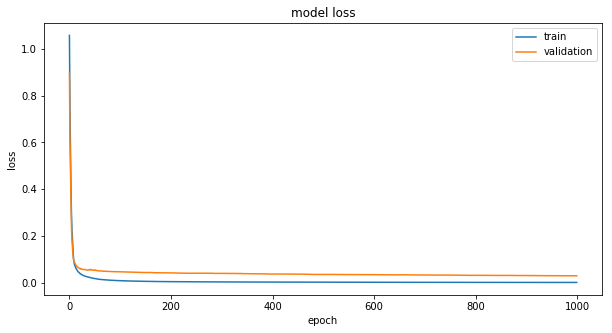

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Model Evaluation

In [21]:
print("Model evaluation")
loss = model.evaluate(X_test,y_test)
print("model","%s: %.2f%%"%(model.metrics_names[0],loss[1]*100))
print("model accuracy:", "%.2f%%" % (100-loss[1]*100))

Model evaluation
15/15 [==============================] - 0s 260us/step
model loss: 0.72%
model accuracy: 99.28%


# Save the trained model to a file so that we can deploy it to a Web App

In [22]:
joblib.dump(model, 'expenditure_model.pkl')

['expenditure_model.pkl']